In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/data-division-encodingandfitting/encoded_flight_wn.csv
/kaggle/input/data-division-encodingandfitting/__results__.html
/kaggle/input/data-division-encodingandfitting/custom.css
/kaggle/input/data-division-encodingandfitting/flight_weather.csv
/kaggle/input/data-division-encodingandfitting/__notebook__.ipynb
/kaggle/input/data-division-encodingandfitting/__output__.json
/kaggle/input/data-division-encodingandfitting/encoded_flight_weather.csv
/kaggle/input/data-division-encodingandfitting/flight_wn.csv
/kaggle/input/flight-wn/encoded_flight_wn.csv


In [28]:
from sklearn.model_selection import train_test_split

In [51]:
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplot'

In [29]:
import category_encoders as ce 
from sklearn.pipeline import Pipeline

In [30]:
import seaborn as sns

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from matplotlib import pyplot

In [32]:
df=pd.read_csv("/kaggle/input/data-division-encodingandfitting/flight_wn.csv")

In [33]:
df.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,Date
0,1,1,4,WN,SFO,DEN,-2.0,967,-2.0,2015-01-01
1,1,1,4,WN,BOS,BWI,-4.0,369,-26.0,2015-01-01
2,1,1,4,WN,LAS,BWI,2.0,2106,-25.0,2015-01-01
3,1,1,4,WN,ABQ,HOU,7.0,759,22.0,2015-01-01
4,1,1,4,WN,PHX,SLC,1.0,507,-6.0,2015-01-01


In [34]:


train, test = train_test_split(df, test_size=0.3)

In [35]:
train

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,Date
795099,8,21,5,WN,PDX,LAS,27.0,763,31.0,2015-08-21
254086,3,21,6,WN,BNA,STL,-2.0,272,-7.0,2015-03-21
469243,5,21,4,WN,MCO,SAT,-3.0,1041,-13.0,2015-05-21
190183,3,2,1,WN,PHX,MCI,87.0,1044,67.0,2015-03-02
464132,5,20,3,WN,ECP,BWI,-6.0,798,-26.0,2015-05-20
...,...,...,...,...,...,...,...,...,...,...
958456,10,9,5,WN,14730,13232,4.0,271,9.0,2015-10-09
258509,3,22,7,WN,MCO,BUF,-7.0,1011,-12.0,2015-03-22
824219,8,30,7,WN,ABQ,PHX,14.0,328,16.0,2015-08-30
1001998,10,22,4,WN,14107,12339,-1.0,1488,-11.0,2015-10-22


In [36]:
encoding_pipeline = Pipeline([
  
  ('encode_origin', ce.TargetEncoder(cols=['ORIGIN_AIRPORT'], return_df=True)),
  ('encode_destination', ce.TargetEncoder(cols=['DESTINATION_AIRPORT'], return_df=True)),
  ('encode_month', ce.TargetEncoder(cols=['MONTH'], return_df=True))
])

# Get the encoded dataset:
e_train = encoding_pipeline.fit_transform(train, train['ARRIVAL_DELAY'])

e_test = encoding_pipeline.transform(test)


In [37]:
e_test.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,Date
1230927,6.789372,28,1,WN,-0.053034,4.368697,-4.0,1411,-23.0,2015-12-28
608704,10.652276,30,2,WN,5.552865,5.818796,-1.0,680,-1.0,2015-06-30
1074452,0.988451,12,4,WN,-0.740813,2.674813,4.0,1986,-3.0,2015-11-12
1190664,6.789372,16,3,WN,5.559137,5.205089,10.0,480,1.0,2015-12-16
200295,3.275451,6,5,WN,-2.823647,3.368403,2.0,873,2.0,2015-03-06


In [38]:
combined = pd.concat([e_train, e_test], ignore_index=True)

In [39]:
combined.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,Date
0,5.629590,21,5,WN,3.670231,2.674813,27.0,763,31.0,2015-08-21
1,3.275451,21,6,WN,3.602047,3.947151,-2.0,272,-7.0,2015-03-21
2,5.685401,21,4,WN,4.472789,6.906256,-3.0,1041,-13.0,2015-05-21
3,3.275451,2,1,WN,6.339568,5.201604,87.0,1044,67.0,2015-03-02
4,5.685401,20,3,WN,-1.772039,3.012597,-6.0,798,-26.0,2015-05-20


In [40]:
combined.to_csv("df.csv",index=False)

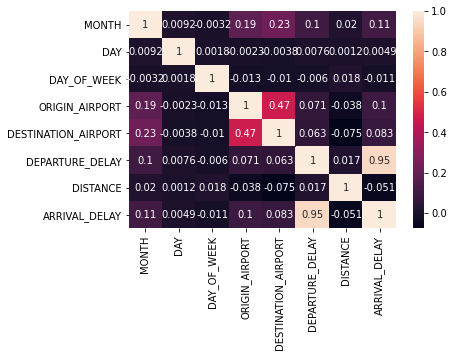

In [41]:
sns.heatmap(e_train.corr(),annot=True)


In [42]:
X_1=combined[['MONTH','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DISTANCE']]
e_train_x1=e_train[['MONTH','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DISTANCE']]
y_1=combined['ARRIVAL_DELAY']
e_train_y1=e_train['ARRIVAL_DELAY']
e_train_x=e_train_x1.to_numpy()
e_train_y=e_train_y1.to_numpy()
e_test_x=e_test[['MONTH','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DISTANCE']].to_numpy()
X=X_1.to_numpy()
y=y_1.to_numpy()

In [43]:
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
#     models['svm'] = SVR()
    return models

In [44]:
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 

In [45]:
models = get_models()

In [46]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>knn -21.014 (0.080)
>cart -18.867 (0.034)


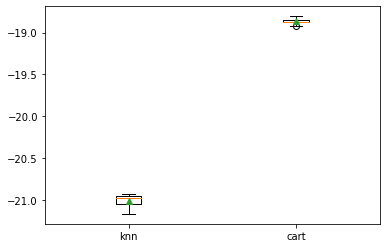

In [47]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [48]:
m=DecisionTreeRegressor()
m.fit(e_train_x,e_train_y)
yhat = m.predict(e_test_x)


In [50]:
plt.figure(figsize=(10,10))
ax1=sns.distplot(e_test['ARRIVAL_DELAY'],hist=False,color='r',label='actual value')
ax2=sns.distplot(yhat,hist=False,color='blue',label='predicted value')

NameError: name 'plt' is not defined